In [1]:
import numpy as np
import pandas as pd
import os
from scipy import misc
import matplotlib.pyplot as plt

from data_transformation.data_prep import process_images_given_path
from viz_analysis.mislabels_correction import GetMislabels

%matplotlib inline

INPUT the RUN NAME: Options : ("A new run name" or "Any Previous Run Name"
 WHICH_RUN = new_test
INPUT: Image-type OPTIONS: (assessor, assessor_code, aerial, overlayed, aerial_cropped, streetside and ensemble 
 IMAGE_TYPE = aerial_cropped


In [2]:
chkpnt_arr = ['epoch_30_batch_9', 'epoch_29_batch_116']
bbox_cropped = False

In [3]:
def vizualize(image_path_array, title_arr, data_type, rows, columns, figsize=(40, 6)):
    fig1, axs = plt.subplots(rows ,columns, figsize=figsize, facecolor='y', edgecolor='k')
    if columns> 1:
        axs = axs.ravel()
    for no, (image_path, title) in enumerate(zip(image_path_array, title_arr)):
        image, _ = process_images_given_path(image_path, img_in_shape=[400, 400, 3], img_out_shape=[224, 224, 3],
                                             img_crop_shape=[128, 128, 3], img_resize_shape=[128, 128, 3],
                                             enable_rotation=True, angle=90)
        axs[no].imshow(np.array(image, dtype=data_type))
        axs[no].set_title(title, fontsize=25)

## CROSS VALIDATION DATA:

In [4]:
(cv_mislabeled_data, cv_land_mis_pins_path, cv_house_mis_pins_path, cv_land_title_arr, 
 cv_house_title_arr) = GetMislabels(which_data='cvalid').main(checkpoint_name_arr = chkpnt_arr, 
                                                              bbox_cropped=bbox_cropped)
cv_mislabeled_data.head()

TypeError: main() got an unexpected keyword argument 'checkpoint_name_arr'

## TEST DATA

In [5]:
(ts_mislabeled_data, ts_land_mis_pins_path, ts_house_mis_pins_path, ts_land_title_arr, 
 ts_house_title_arr) = GetMislabels(which_data='test').main(checkpoint_name_arr = chkpnt_arr, bbox_cropped=bbox_cropped)
ts_mislabeled_data.head()

(1120, 5) (1120, 3) (1120, 4)
epoch_16_batch_70_pred_prob >= 1 & true_label-epoch_16_batch_70_pred_label!=0 & epoch_17_batch_59_pred_prob >= 1 & true_label-epoch_17_batch_59_pred_label!=0
18 19
18 19


property_pins property_type  bbox_cropped  true_label  \
107  13-12-232-030-0000          land             1         0.0   
146  16-15-206-012-0000          land             1         0.0   
182  16-01-409-024-0000          land             1         0.0   
233  17-16-246-015-0000          land             0         0.0   
239  16-14-401-054-0000          land             1         0.0   

     epoch_16_batch_70_pred_label  epoch_16_batch_70_pred_prob  \
107                           1.0                          1.0   
146                           1.0                          1.0   
182                           1.0                          1.0   
233                           1.0                          1.0   
239                           1.0                          1.0   

     epoch_17_batch_59_pred_label  epoch_17_batch_59_pred_prob  
107                           1.0                          1.0  
146                           1.0                          1.0  
182                           1.0                          1.0  
233                           1.0                          1.0  
239                           1.0                          1.0

### CVALID: ACTUALLY HOUSE

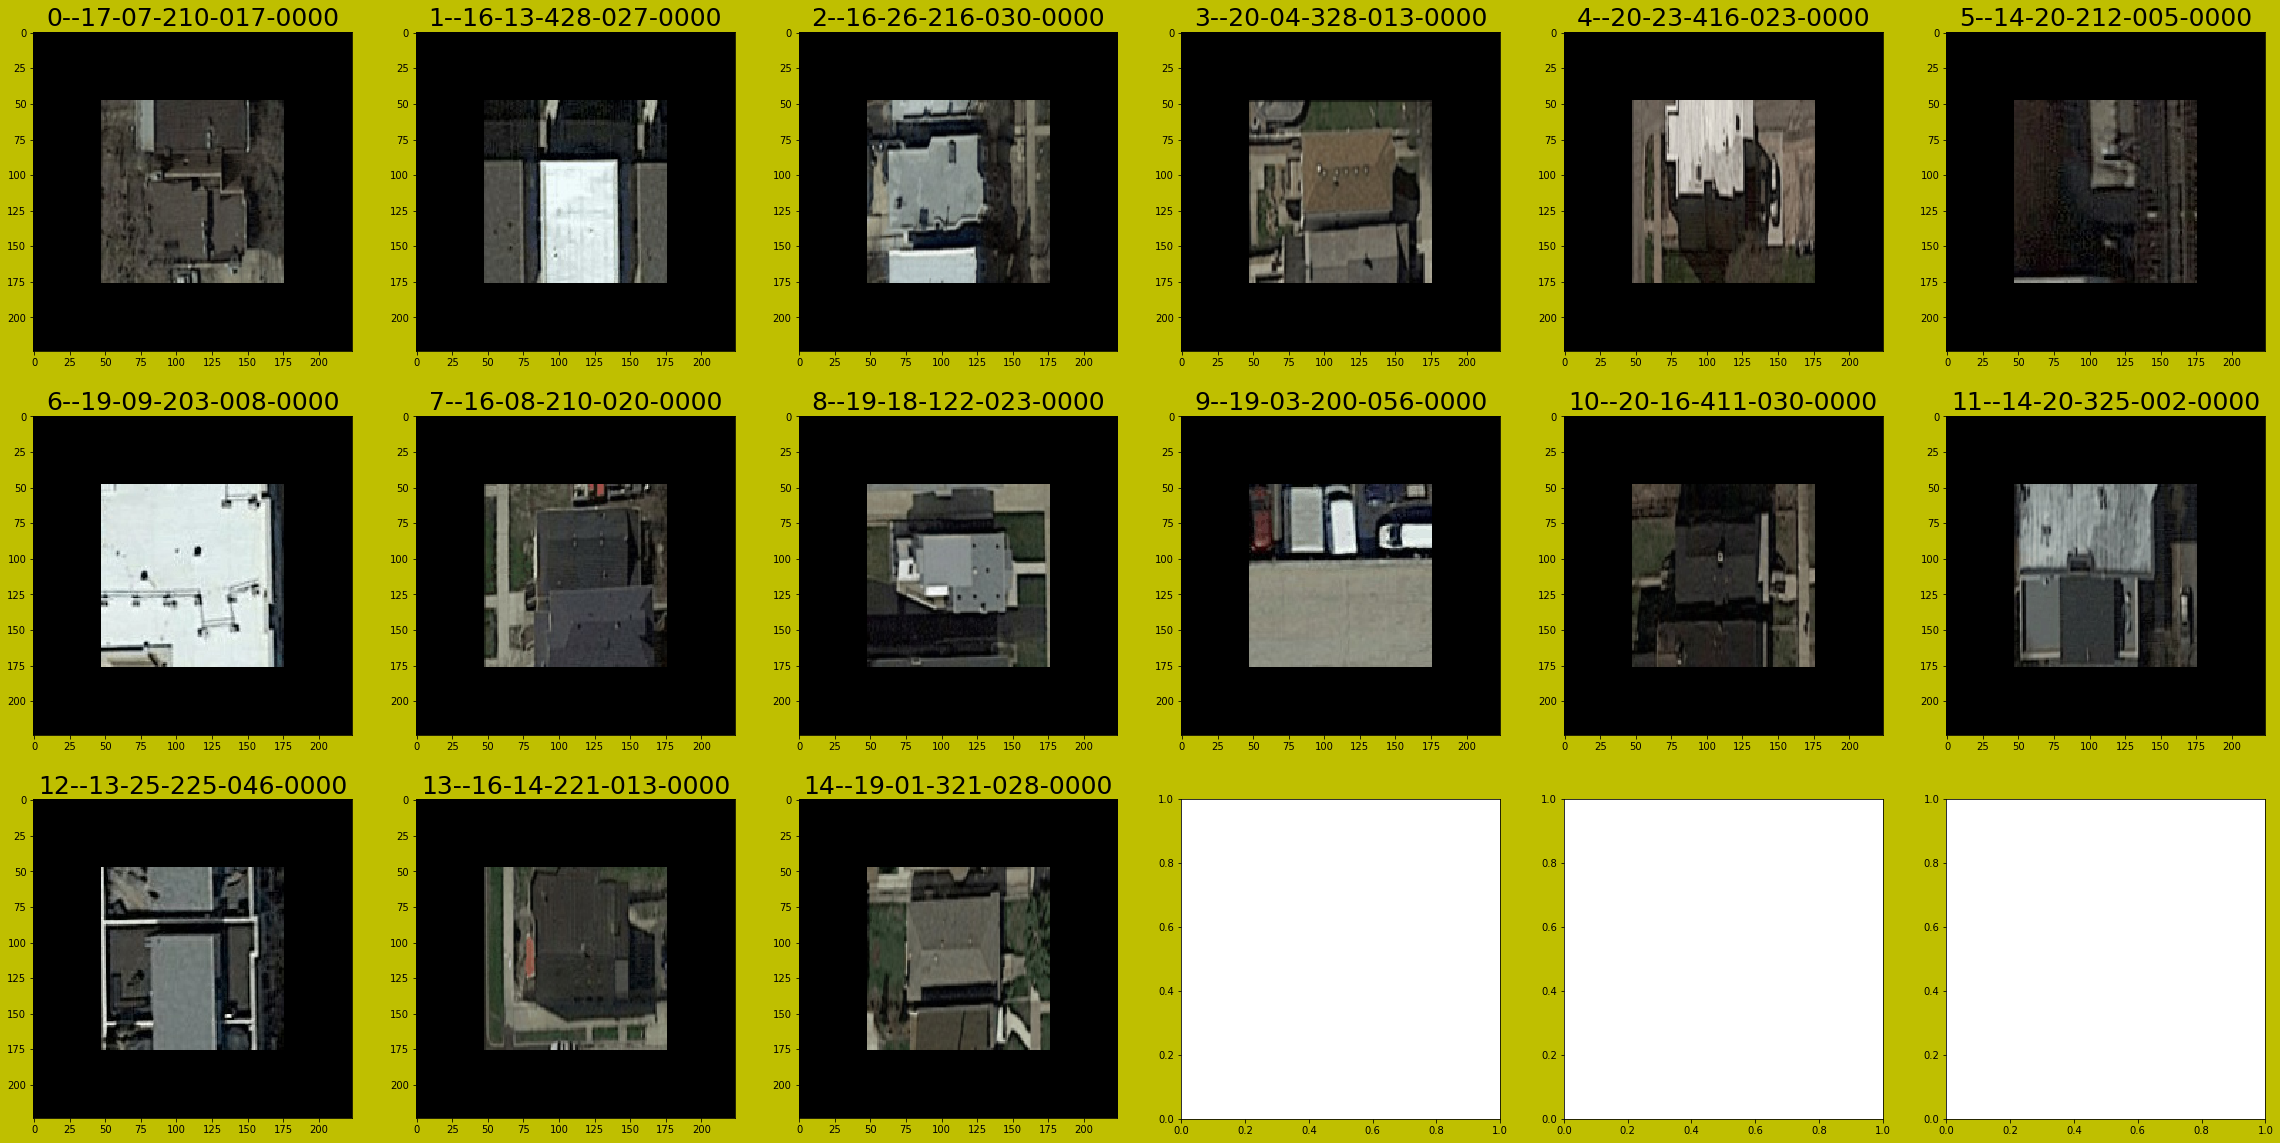

In [6]:
vizualize(cv_land_mis_pins_path, cv_land_title_arr, data_type='uint8', rows=3, columns=6, figsize=(40, 20))

### CVALID: ACTUALLY LAND

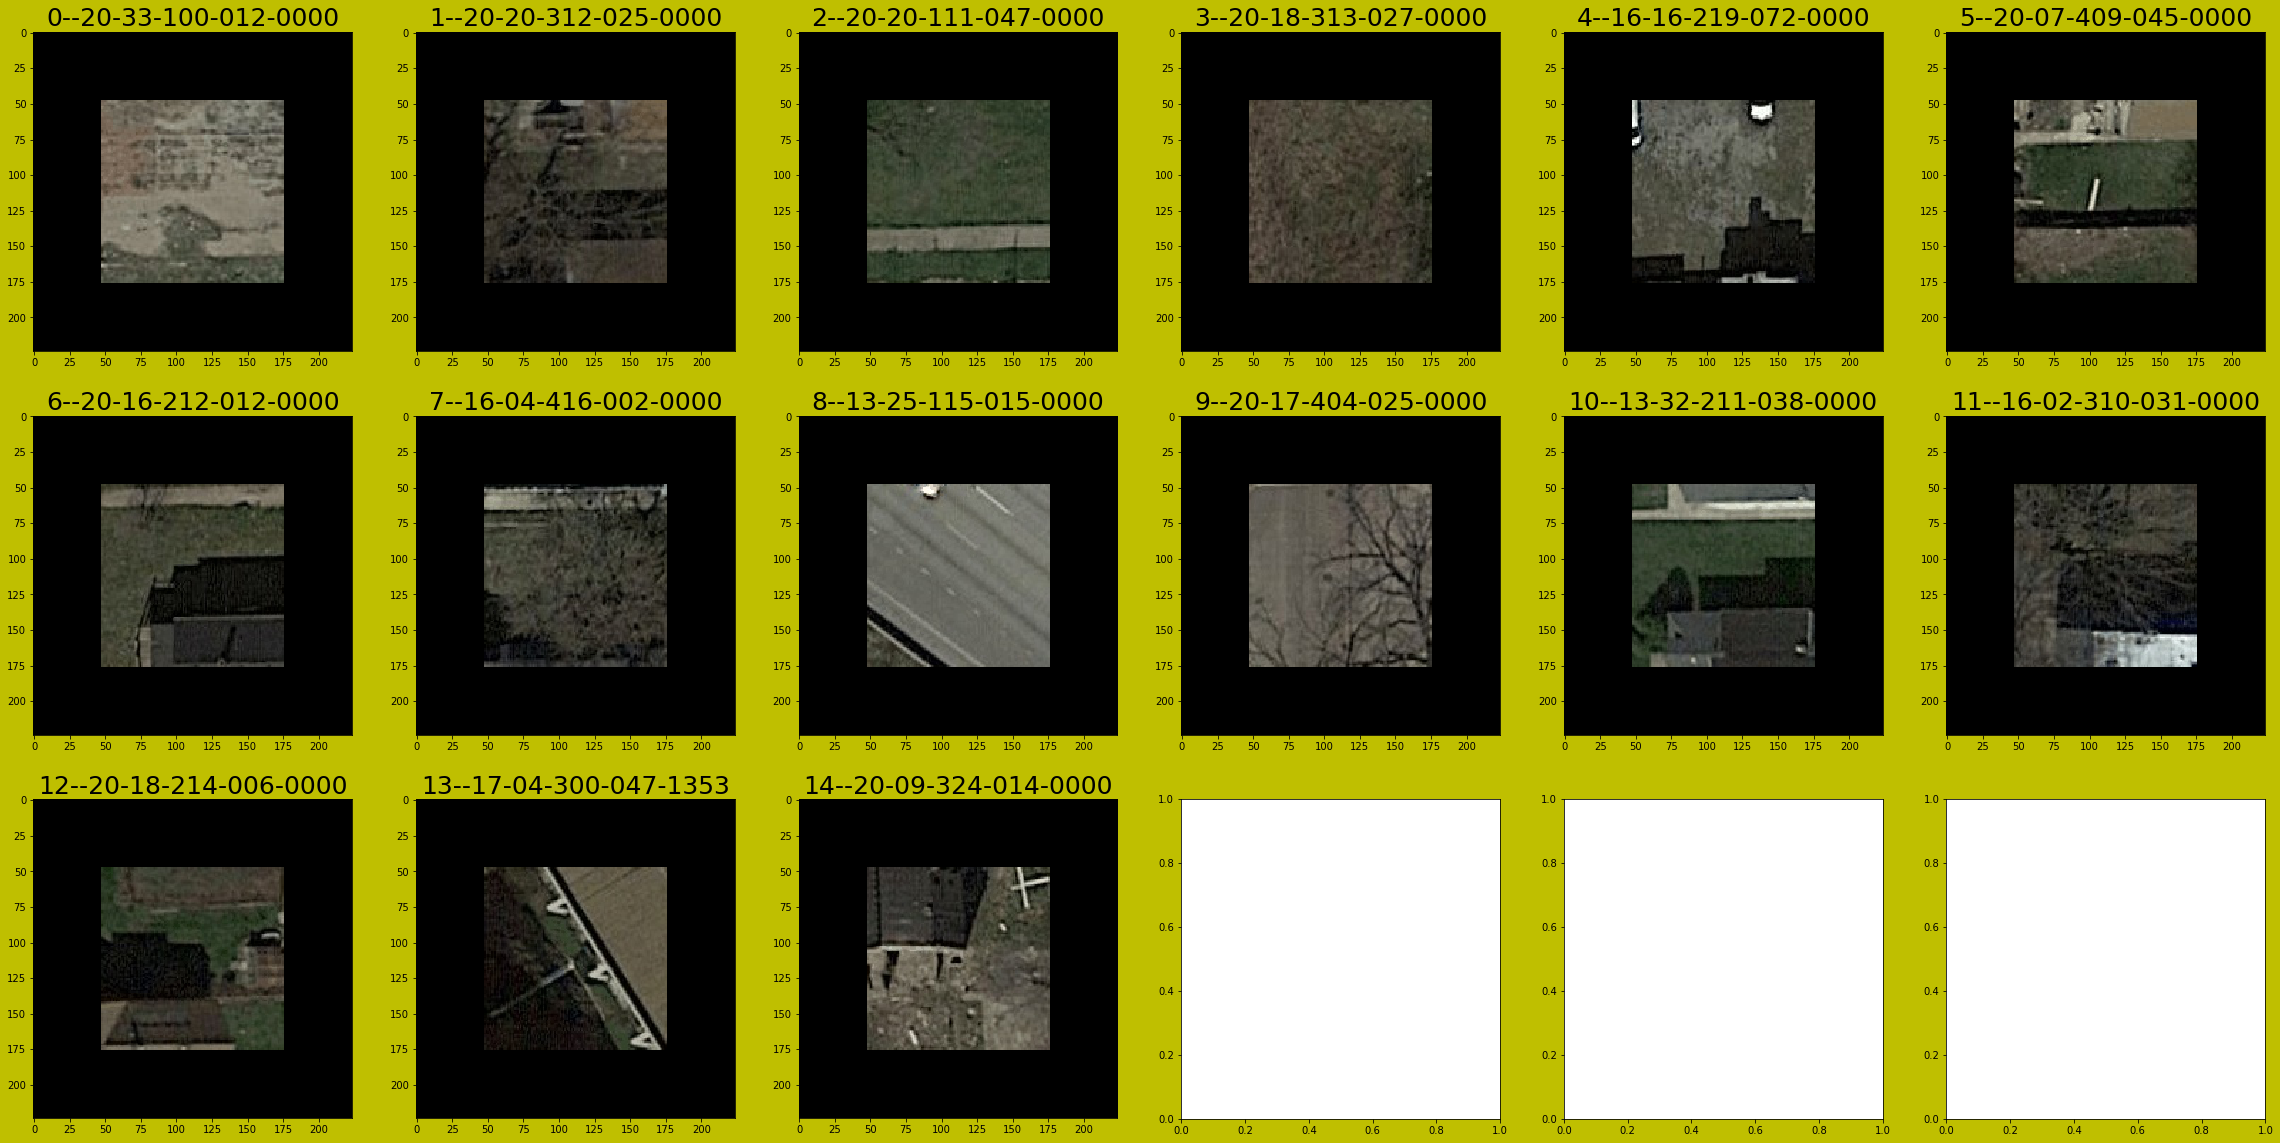

In [8]:
vizualize(cv_house_mis_pins_path, cv_house_title_arr, data_type='uint8', rows=3, columns=6, figsize=(40, 20))

### TEST: ACTUALLY HOUSE

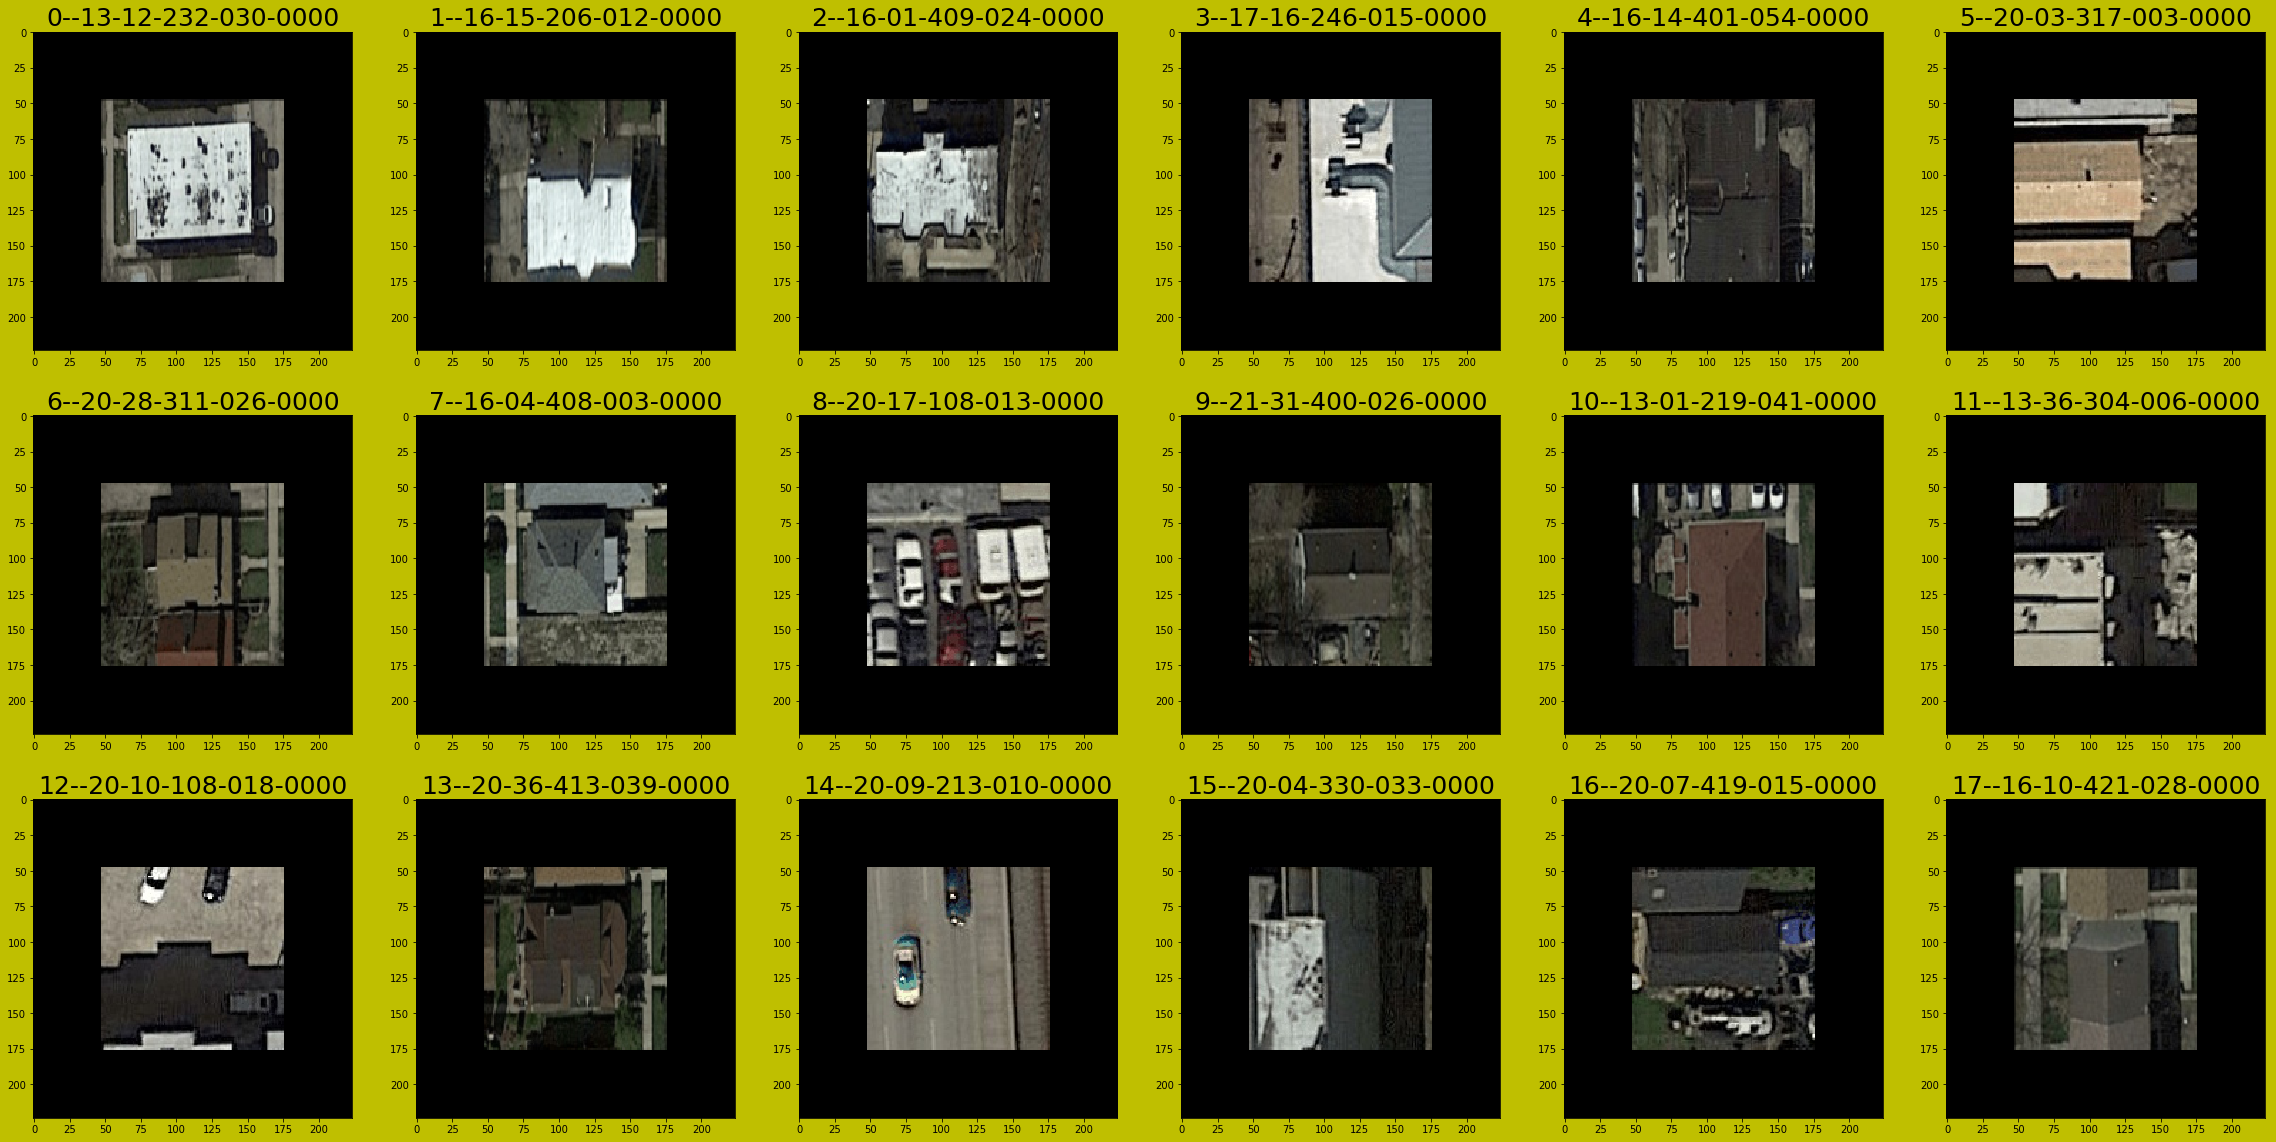

In [10]:
vizualize(ts_land_mis_pins_path, ts_land_title_arr, data_type='uint8', rows=3, columns=6, figsize=(40, 20))

### TEST: ACTUALLY LAND

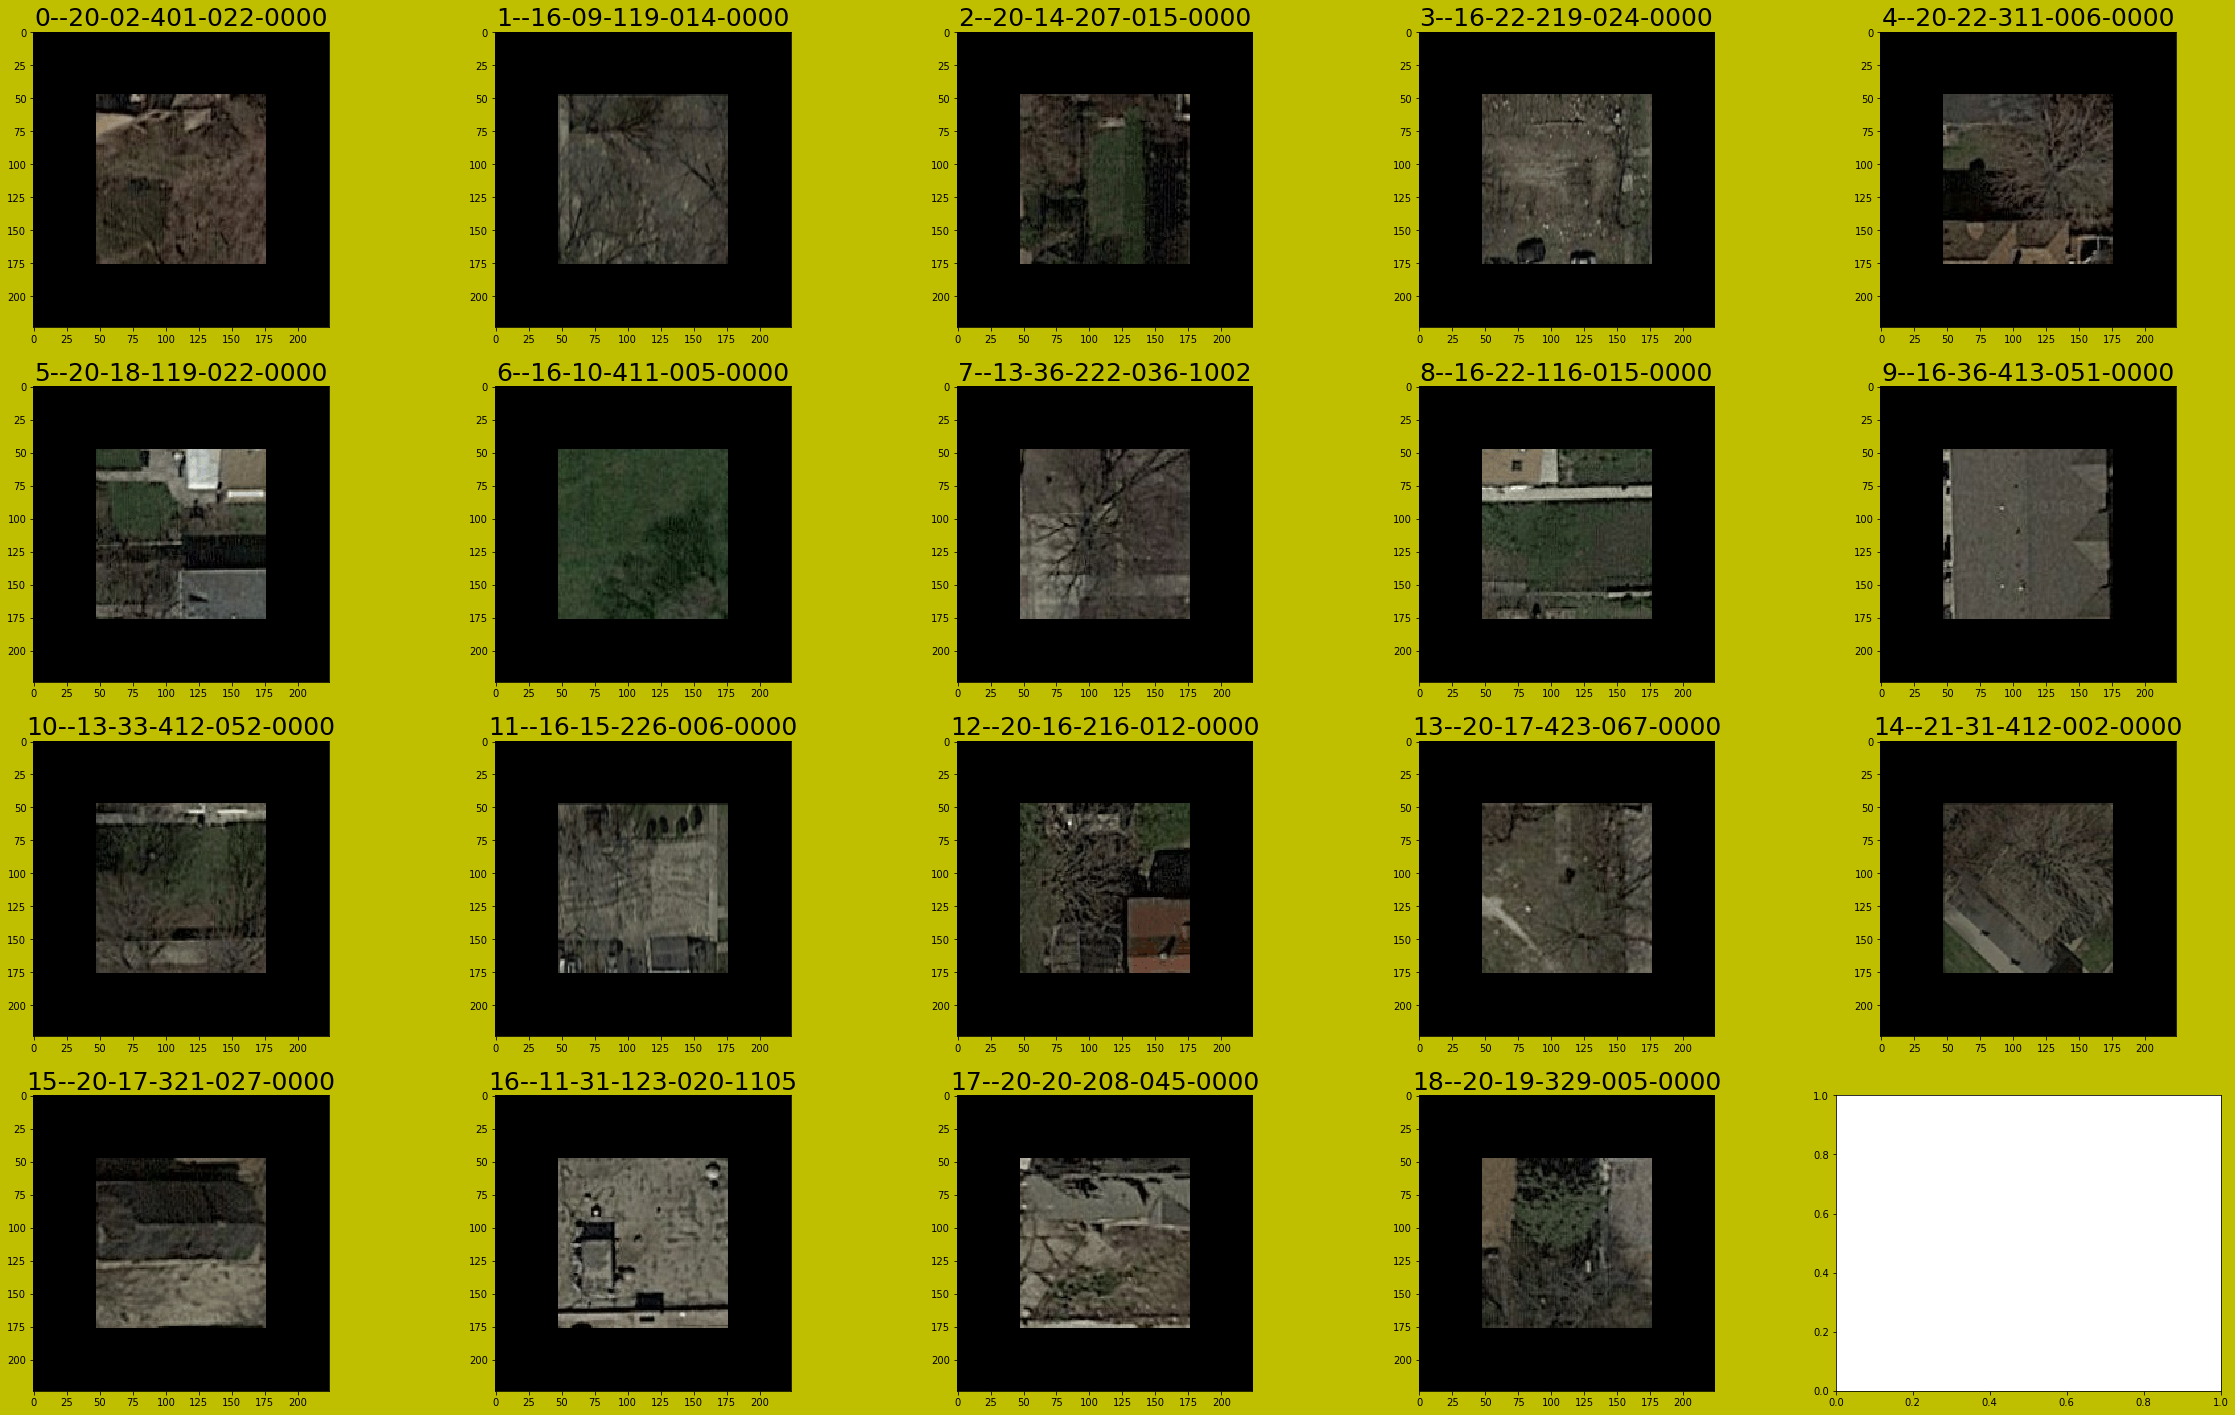

In [12]:
vizualize(ts_house_mis_pins_path, ts_house_title_arr, data_type='uint8', rows=4, columns=5, figsize=(40, 25))

# Analytical Answers for Questions:

### Actual Land: Predicted House, Prediction Probability = 1 

In [10]:
aerial_cropped_cv = pd.read_csv(aerial_cropped_cv_stats)
aerial_cropped_ts = pd.read_csv(aerial_cropped_ts_stats)
print (aerial_cropped_cv.shape, aerial_cropped_ts.shape)
pd.concat([aerial_cropped_cv.tail(), aerial_cropped_ts.tail()])

(10080, 5) (10080, 5)


checkpoint test_batch  true_label  pred_label  pred_prob
10075  epoch_17_batch_59     cvalid         1.0           1      0.972
10076  epoch_17_batch_59     cvalid         1.0           1      1.000
10077  epoch_17_batch_59     cvalid         1.0           1      1.000
10078  epoch_17_batch_59     cvalid         1.0           1      0.854
10079  epoch_17_batch_59     cvalid         1.0           1      1.000
10075  epoch_17_batch_59       test         1.0           0      0.925
10076  epoch_17_batch_59       test         1.0           1      1.000
10077  epoch_17_batch_59       test         1.0           1      1.000
10078  epoch_17_batch_59       test         1.0           0      1.000
10079  epoch_17_batch_59       test         1.0           0      0.835

In [11]:
checkpoint_name = 'epoch_17_batch_59'
cv_land_mis, cv_house_mis, ts_land_mis, ts_house_mis = get_mislabeled(checkpoint_name)
print (cv_land_mis.shape, cv_house_mis.shape, ts_land_mis.shape, ts_house_mis.shape)
pd.concat([cv_land_mis.head(2), cv_house_mis.head(2), ts_land_mis.head(2), ts_house_mis.head(2)])

Aerial Cropped data:  (10080, 5) (10080, 5)
Checkpoint : (1120, 6) (1120, 6)


NameError: name 'cvalid_pins' is not defined

In [64]:
cv_land_mis_pins_path, cv_house_mis_pins_path, ts_land_mis_pins_path, ts_house_mis_pins_path = get_pins(cv_land_mis, cv_house_mis, ts_land_mis, ts_house_mis)
cv_land_mis_pins_title, cv_house_mis_pins_title, ts_land_mis_pins_title, ts_house_mis_pins_title = get_title_array(cv_land_mis, cv_house_mis, ts_land_mis, ts_house_mis)

17 15 20 19
17 15 20 19


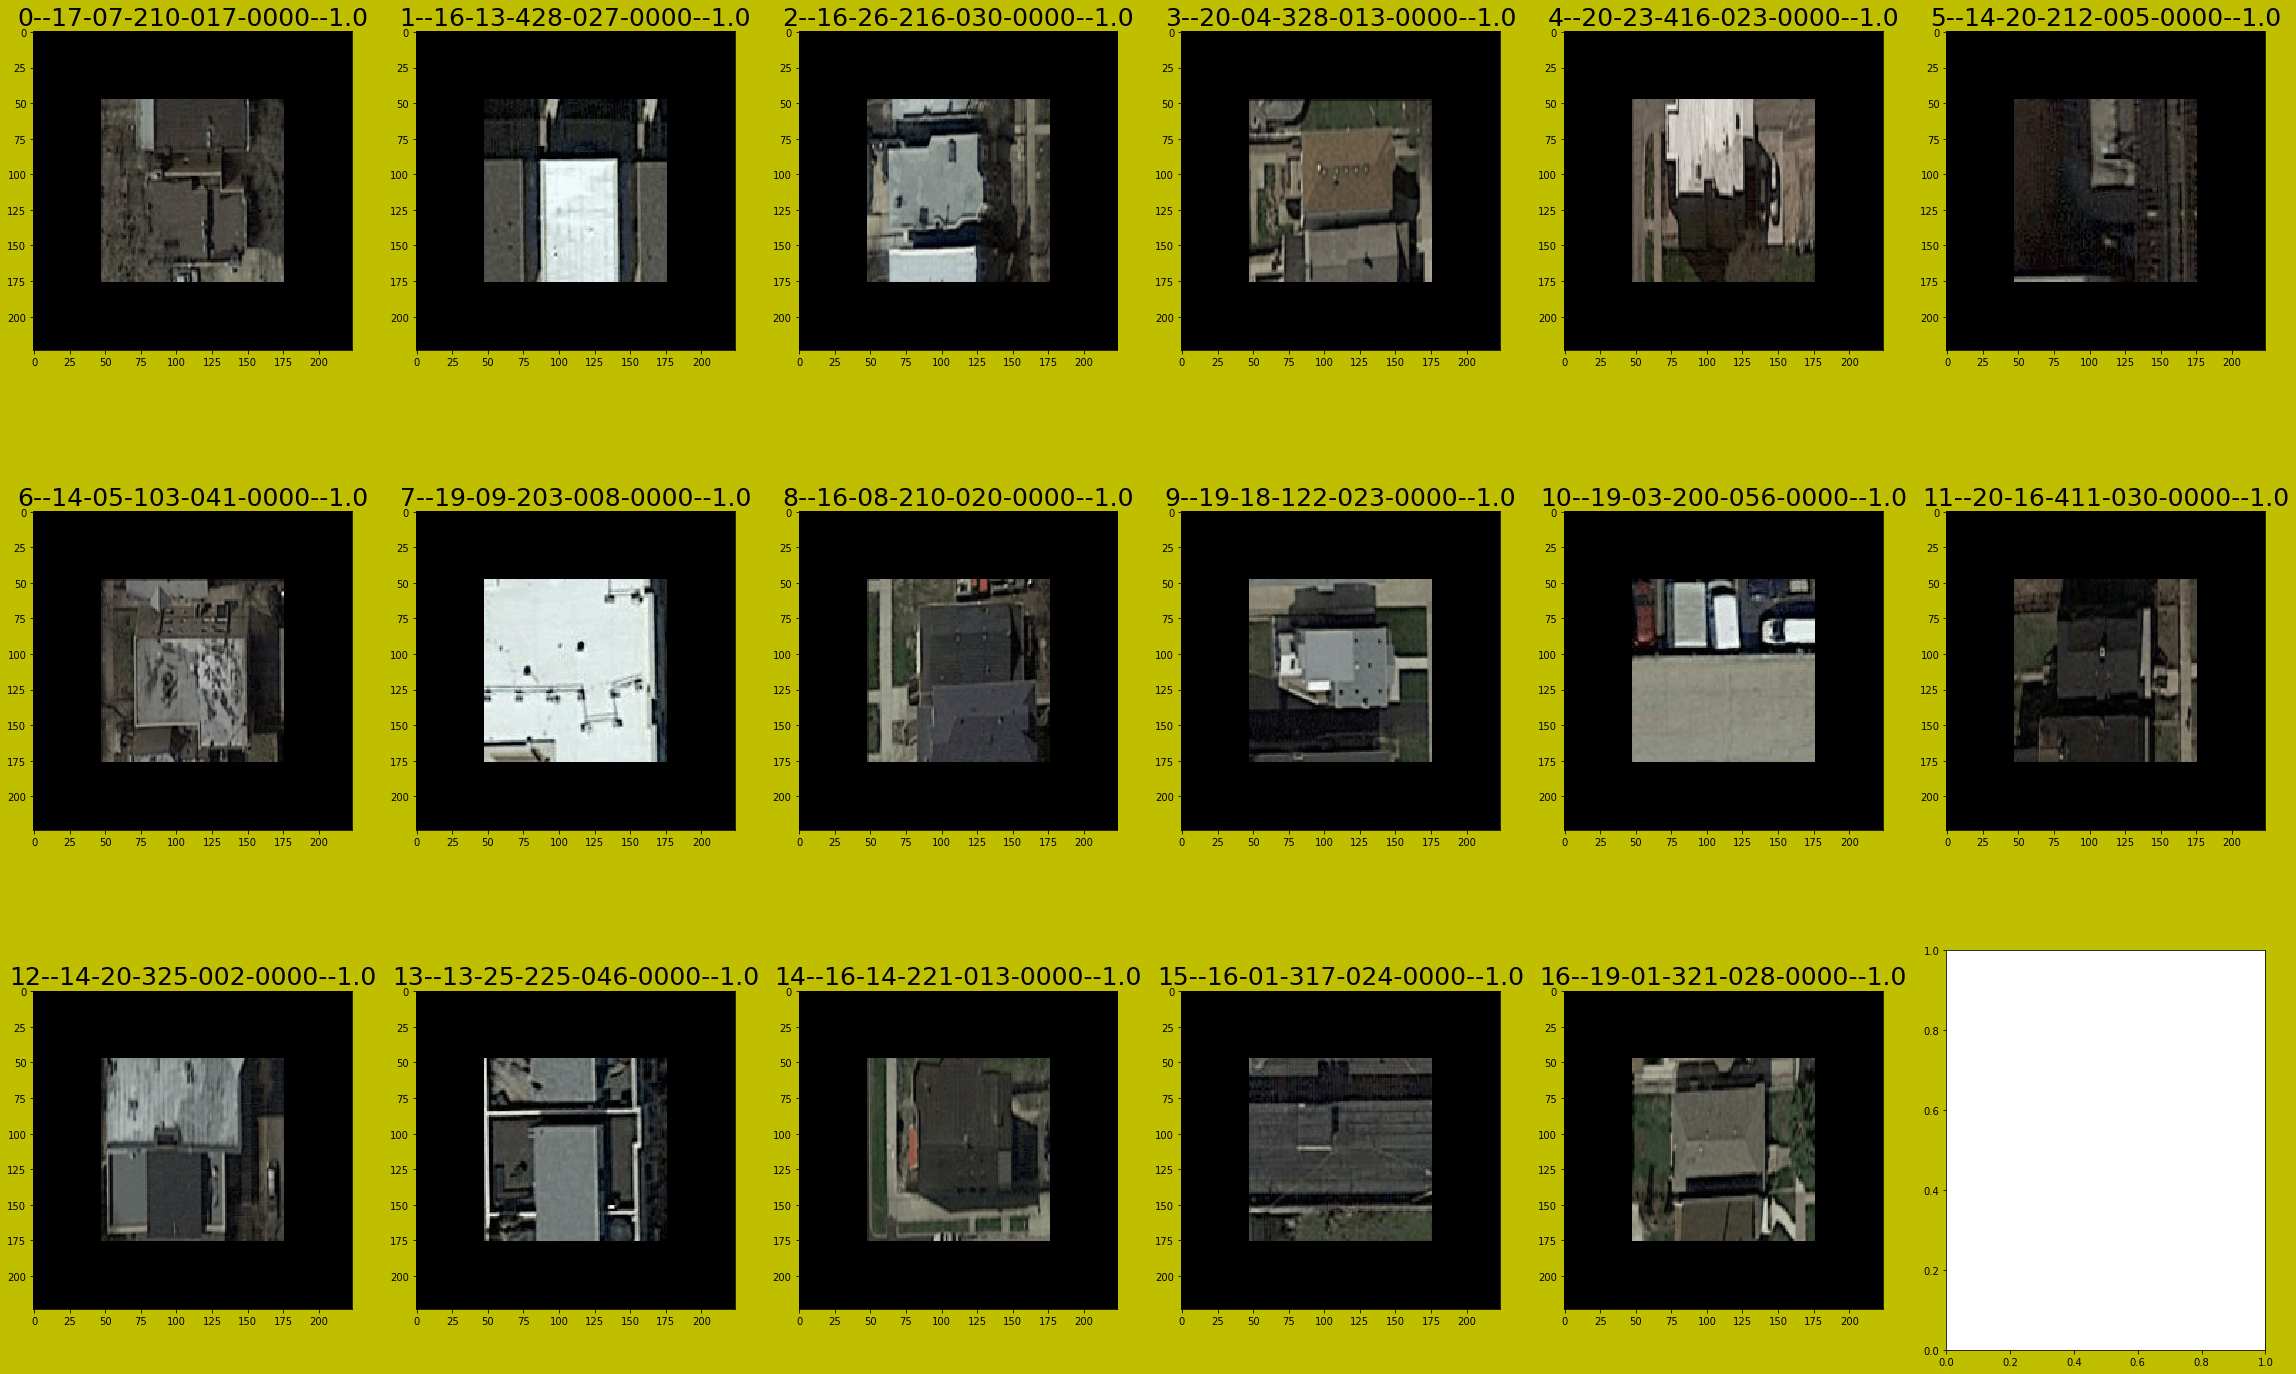

In [65]:
vizualize(obj_gI, cv_land_mis_pins_path, cv_land_mis_pins_title, data_type='uint8', rows=3, columns=6, figsize=(40, 25))

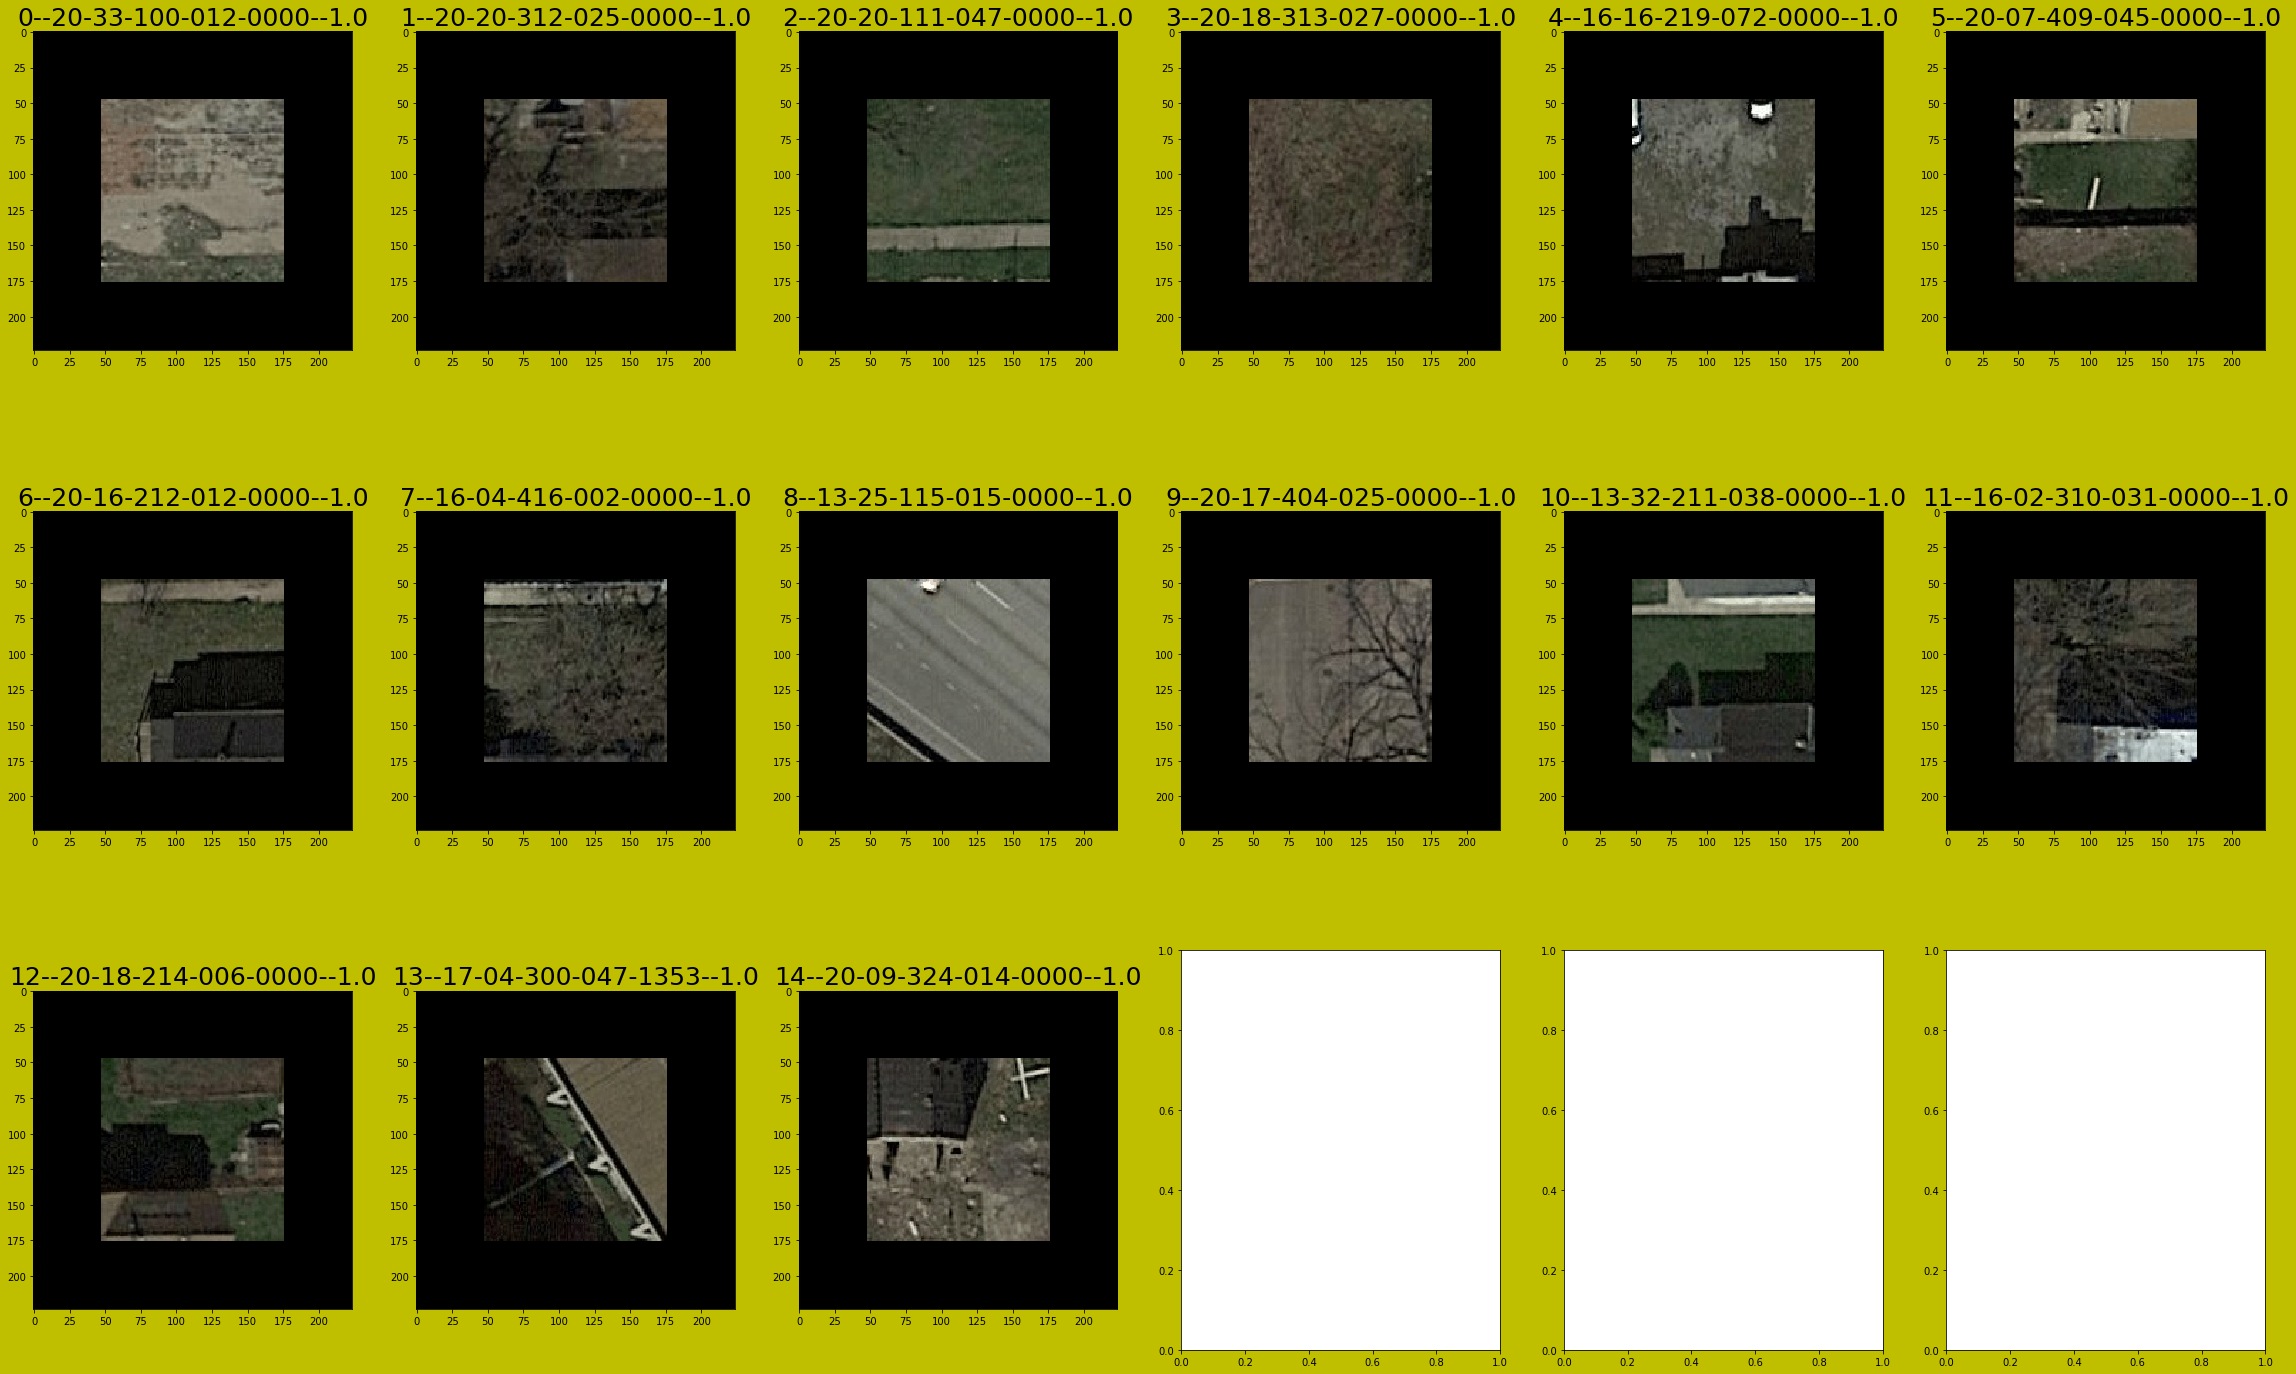

In [66]:
vizualize(obj_gI, cv_house_mis_pins_path, cv_house_mis_pins_title, data_type='uint8', rows=3, columns=6, figsize=(40, 25))

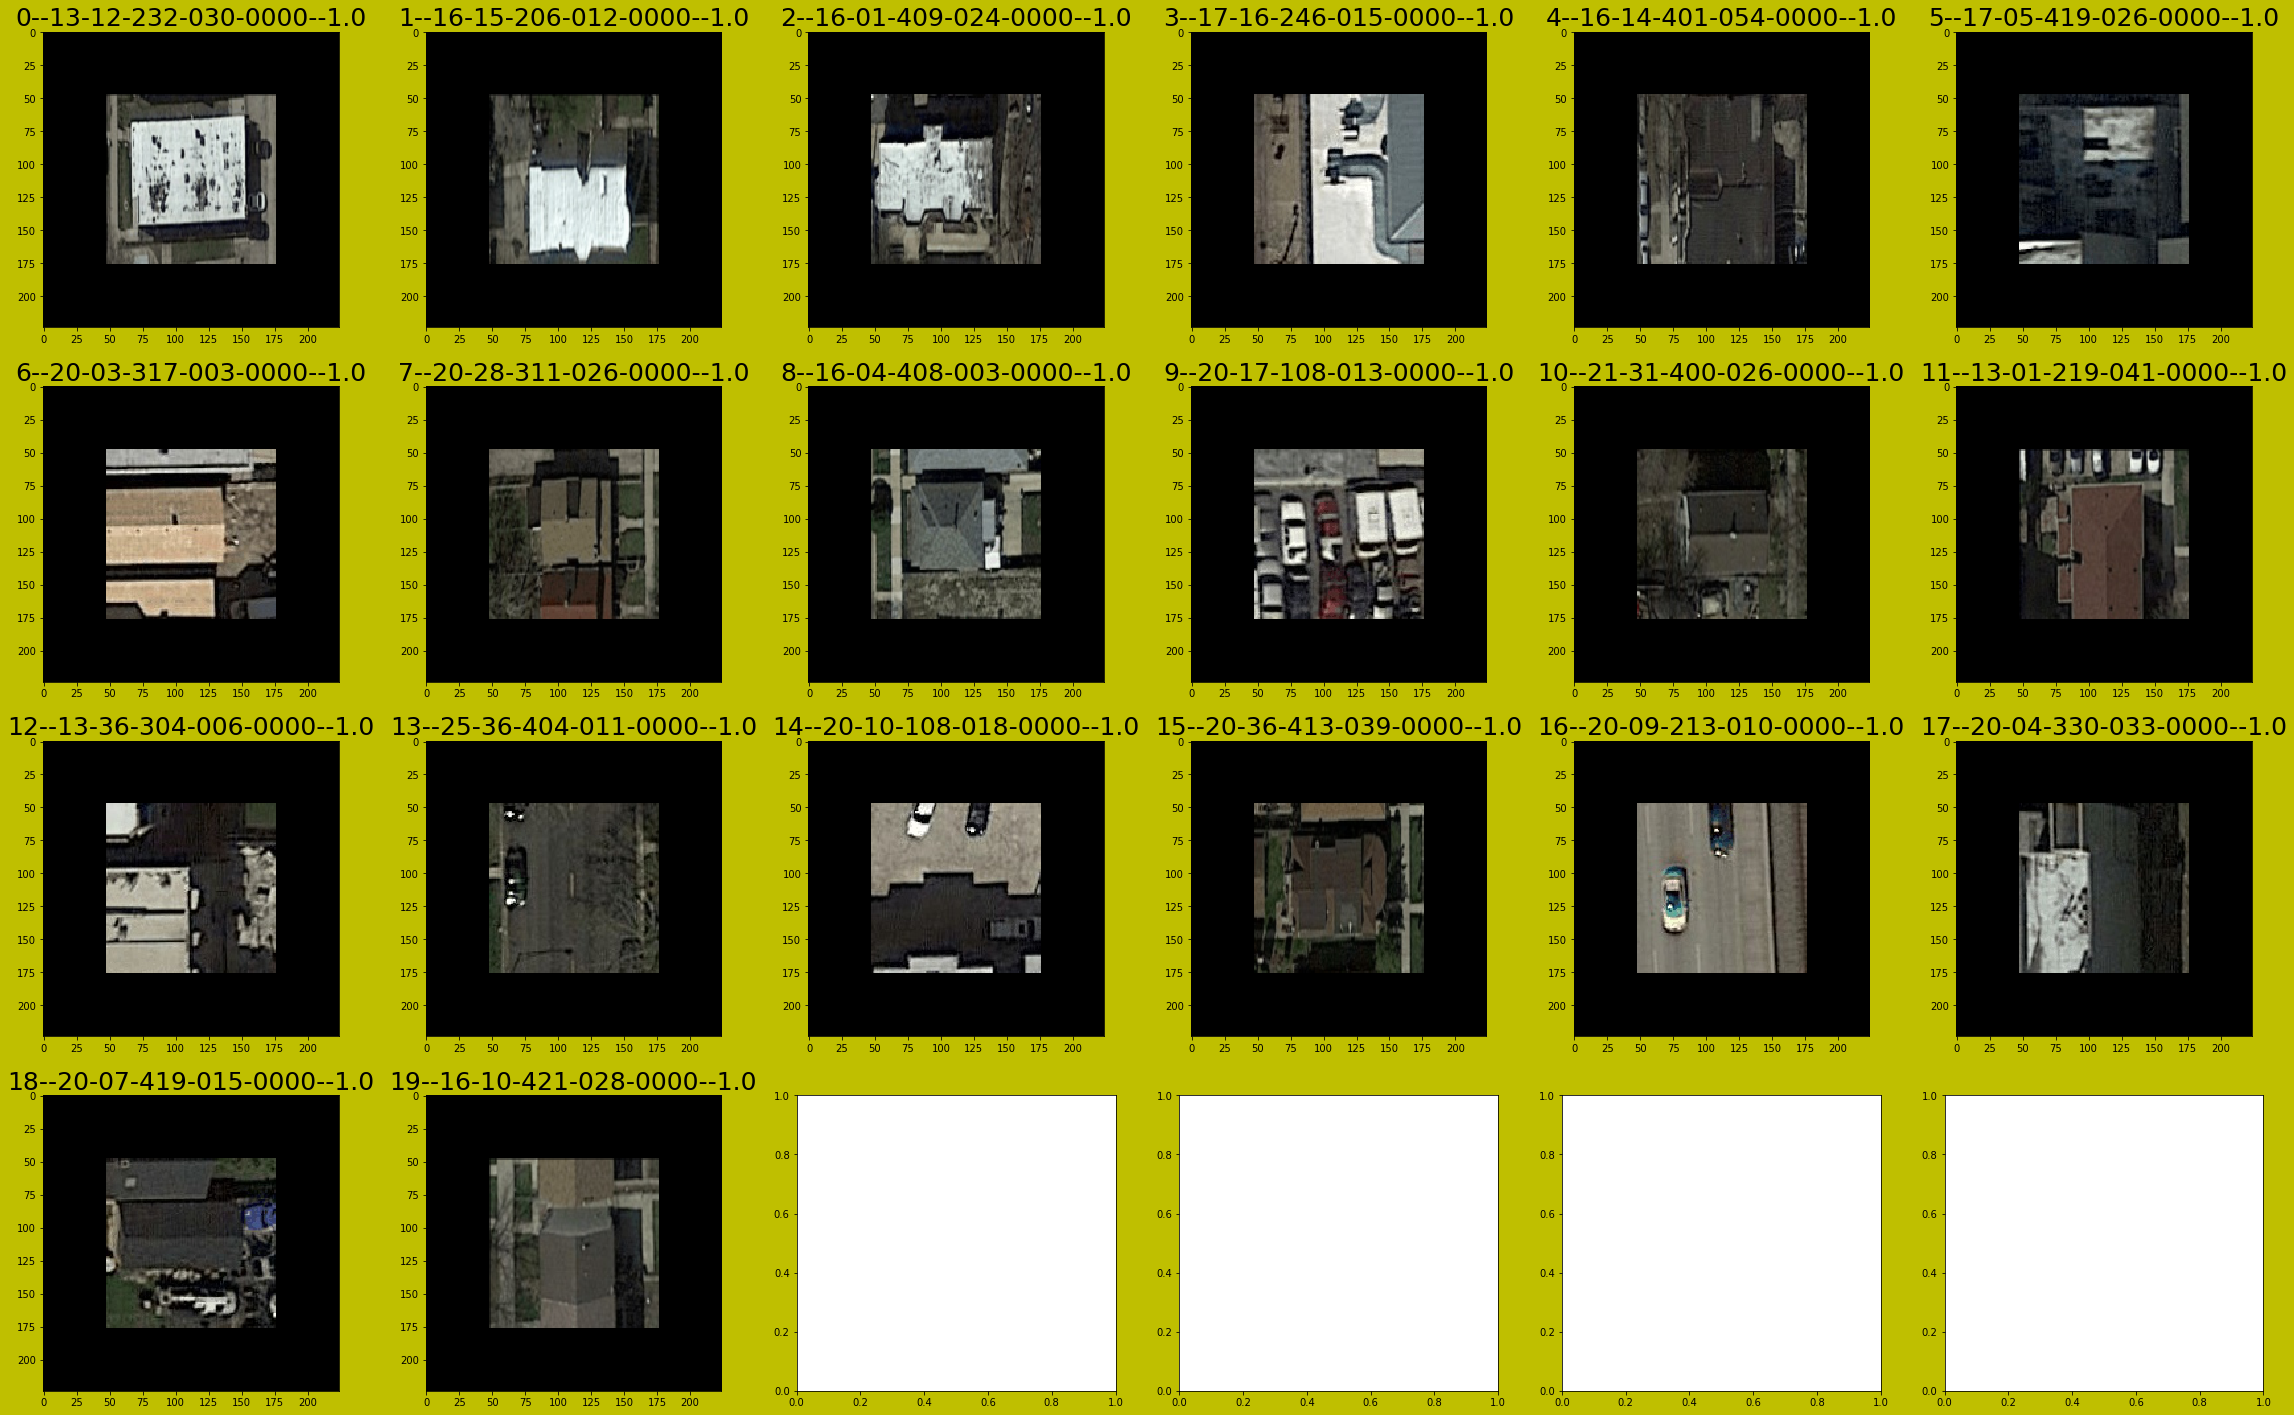

In [68]:
vizualize(obj_gI, ts_land_mis_pins_path, ts_land_mis_pins_title, data_type='uint8', rows=4, columns=6, figsize=(40, 25))

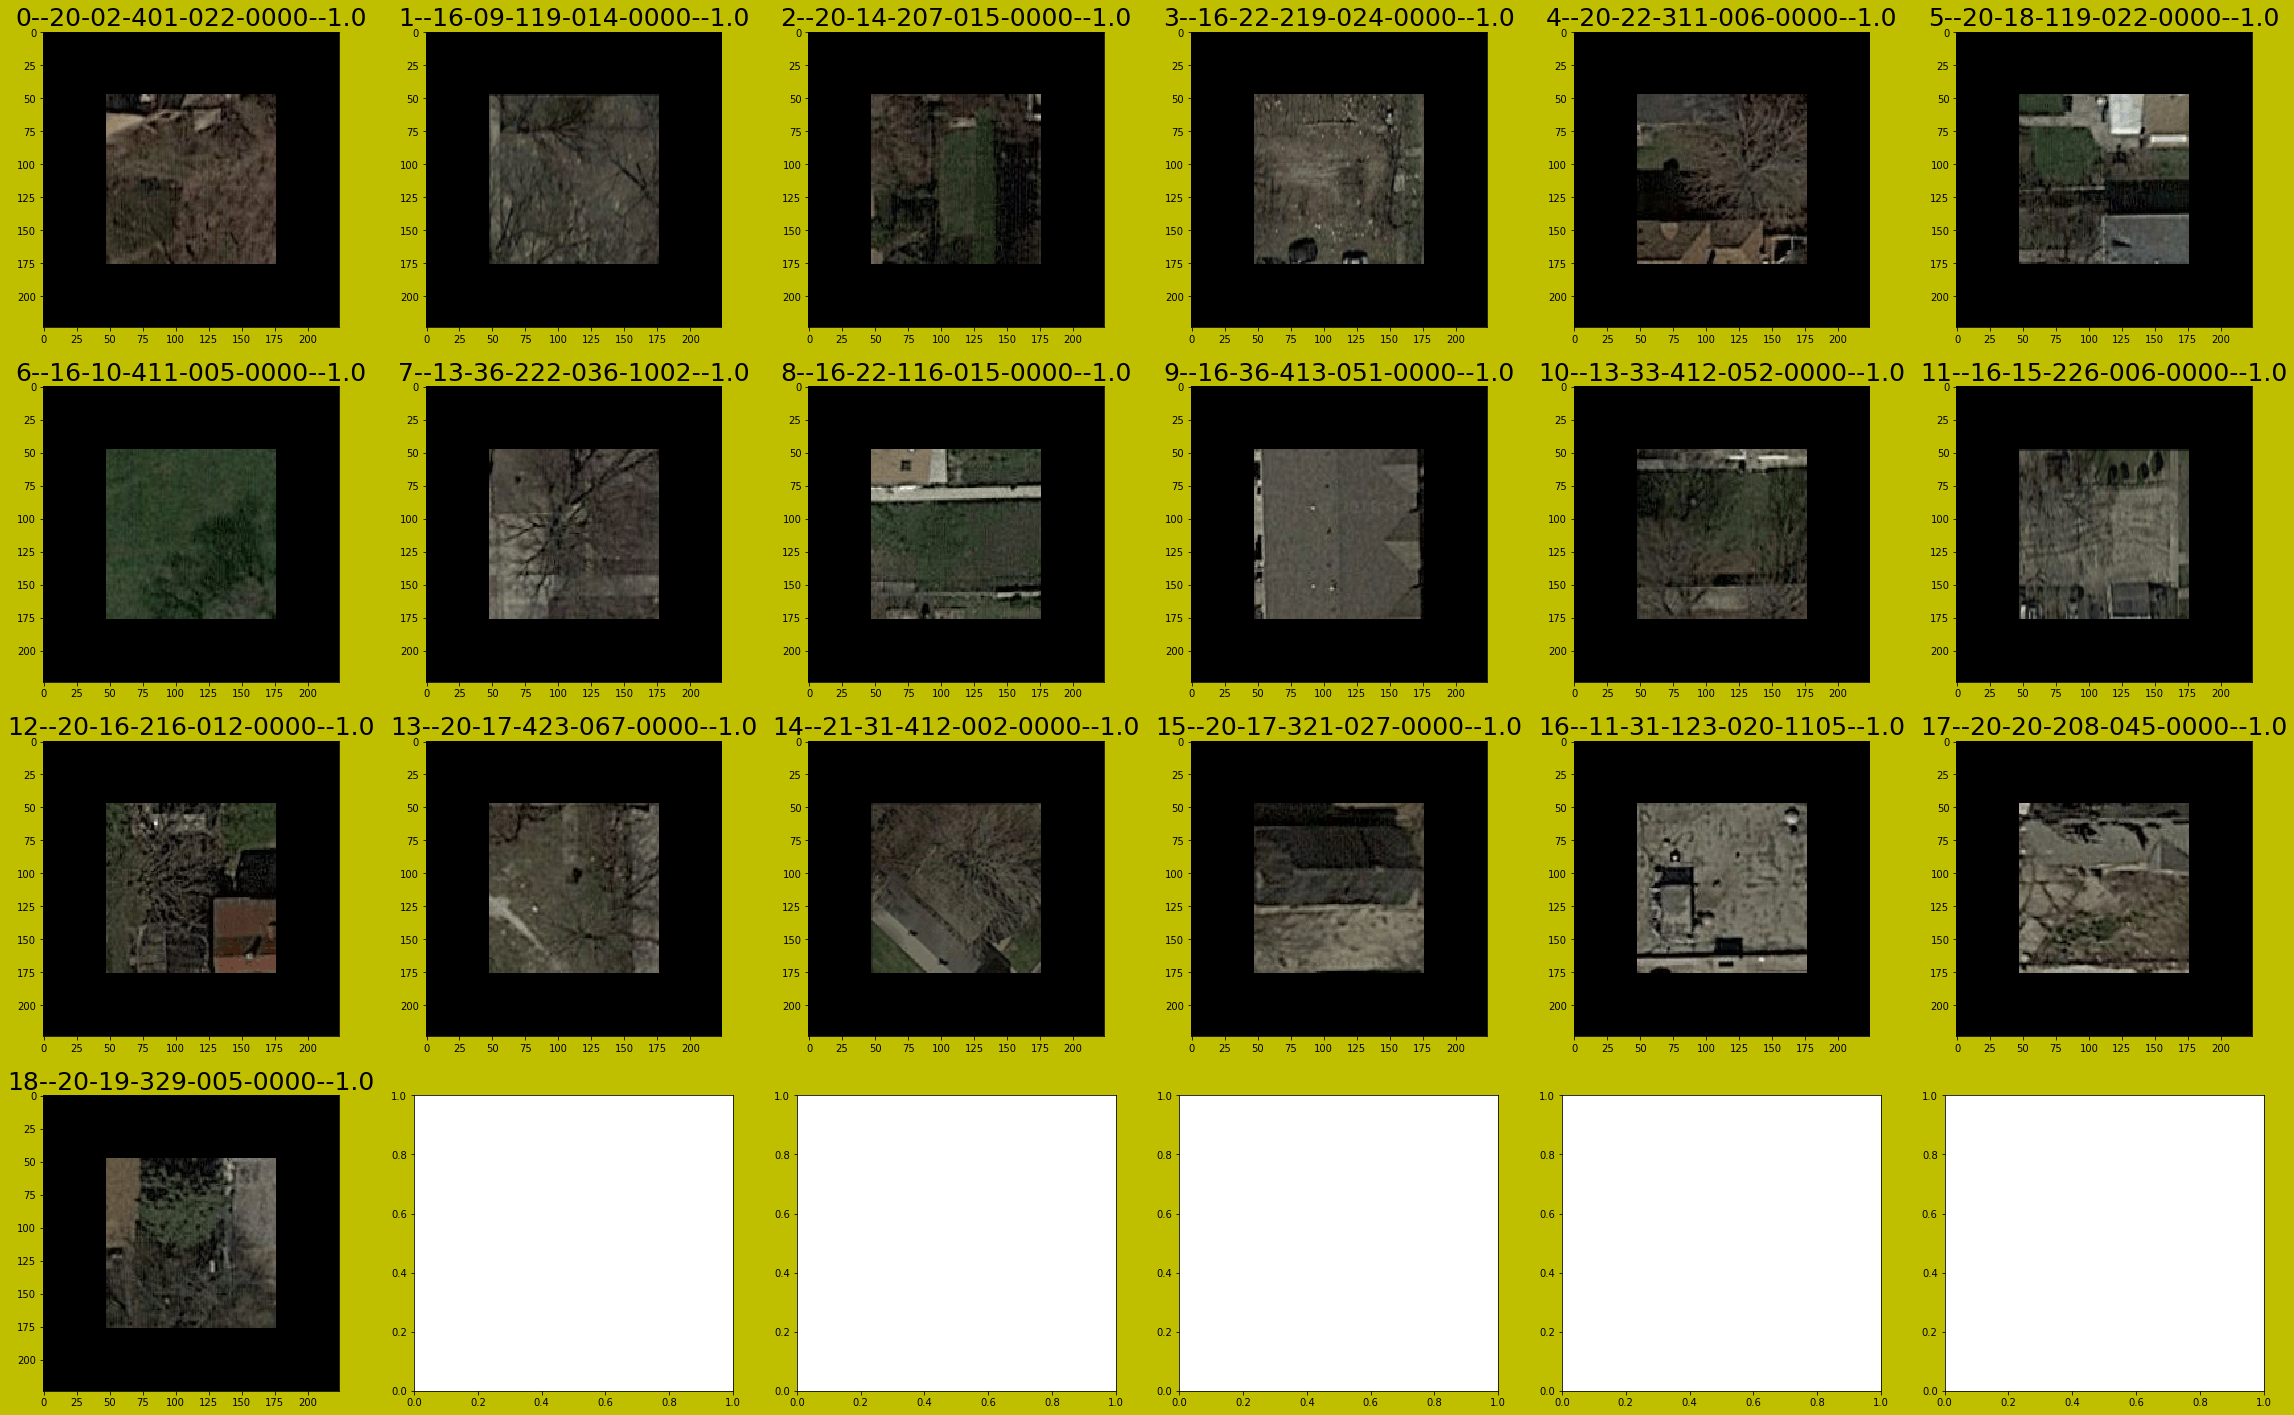

In [69]:
vizualize(obj_gI, ts_house_mis_pins_path, ts_house_mis_pins_title, data_type='uint8', rows=4, columns=6, figsize=(40, 25))